## Cancer Patient Survival Prediction Using RWD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [7]:
data = pd.read_csv("/Users/arunekambaram/Desktop/Cancer Patient Survival Prediction/data/SEER Breast Cancer Dataset .csv")
data.head(5)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [9]:
data.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [10]:
data.drop(columns=['Unnamed: 3'], inplace=True)
data.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [11]:
cat_feats = ['Race ','Marital Status','T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status']
num_feats = ['Age','Tumor Size','Regional Node Examined','Reginol Node Positive']

## Exploratory Data Analysis

Continuous Data

In [13]:
data[num_feats].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive
count,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052
std,8.963134,21.119696,8.099675,5.109331
min,30.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000
50%,54.000000,25.000000,14.000000,2.000000
75%,61.000000,38.000000,19.000000,5.000000
max,69.000000,140.000000,61.000000,46.000000


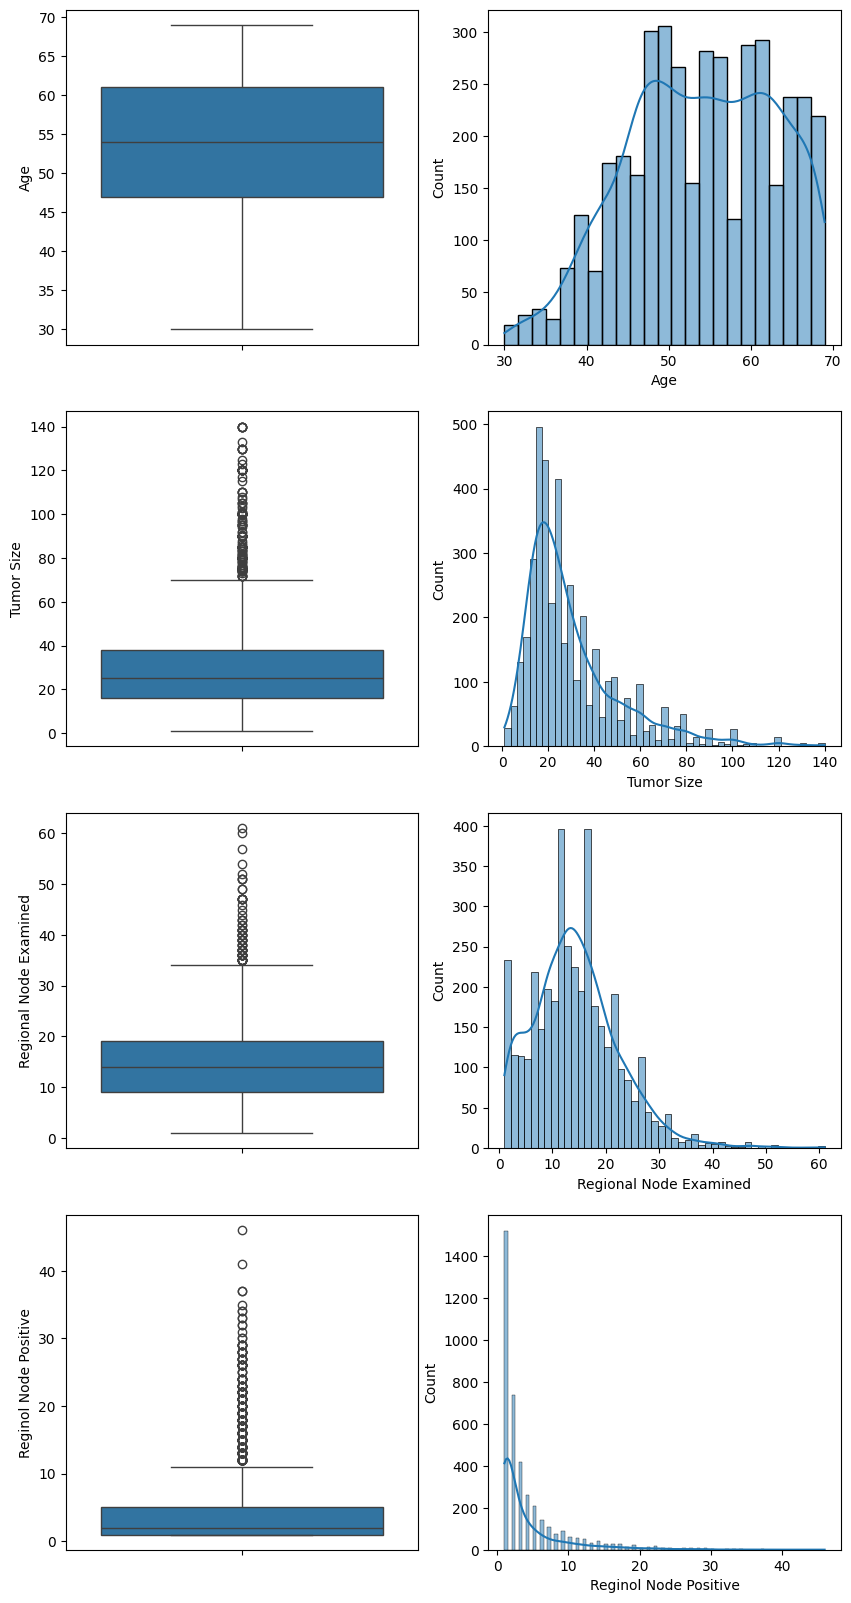

In [14]:
plt.figure(figsize=(10,20))
for i in range(len(num_feats)):
    plt.subplot(4,2,2*i+1)
    sns.boxplot(data=data,y=num_feats[i])
    plt.subplot(4,2,2*i+2)
    sns.histplot(data, x=num_feats[i], kde=True)

#### Age
* The youngest patients is 30 and the oldest patient is 69 years old.
* 25% of the patients are below 47 years old and 75 % of the patients are above 47 years old (25% percentile). 50% of the patients are below 54 years old and 50% of the patients are above 54 years old (median). 75 % of the patients are below 61 and 25 % of the patients are above 61 years old (75% percentile).

<b>The distribution is negatively skewed (skewed to the left).</b>

#### Tumor Size
* The smallest tumor is 1 cm and the largest tumor is 140 cm.
* 25% of the tumors are below 16 cm and 75 % of the tumors are above 16 cm (25% percentile). 50% of the tumors are below 25 cm and 50% of the tumors are above 25 cm (median). 75 % of the tumors are below 38 cm and 25 % of the tumors are above 38 cm (75% percentile).

<b>As we can see the distribution is skewed to the right.</b>

### Categorical Data

In [16]:
data[cat_feats].describe()

,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,2,2,2
top,White,Married (including common law),T2,N1,IIA,Moderately differentiated; Grade II,Regional,Positive,Positive
freq,3413,2643,1786,2732,1305,2351,3932,3755,3326


In [17]:
for i in cat_feats:
    print(i + " value count\n")
    print(data[i].value_counts()/len(data) * 100)
    print("\n---------------------\n")

Race  value count

Race 
White                                                        84.816103
Other (American Indian/AK Native, Asian/Pacific Islander)     7.952286
Black                                                         7.231610
Name: count, dtype: float64

---------------------

Marital Status value count

Marital Status
Married (including common law)    65.680915
Single (never married)            15.283300
Divorced                          12.077535
Widowed                            5.839960
Separated                          1.118290
Name: count, dtype: float64

---------------------

T Stage  value count

T Stage 
T2    44.383698
T1    39.835984
T3    13.245527
T4     2.534791
Name: count, dtype: float64

---------------------

N Stage value count

N Stage
N1    67.892644
N2    20.377734
N3    11.729622
Name: count, dtype: float64

---------------------

6th Stage value count

6th Stage
IIA     32.430417
IIB     28.081511
IIIA    26.093439
IIIC    11.729622
IIIB     1.665

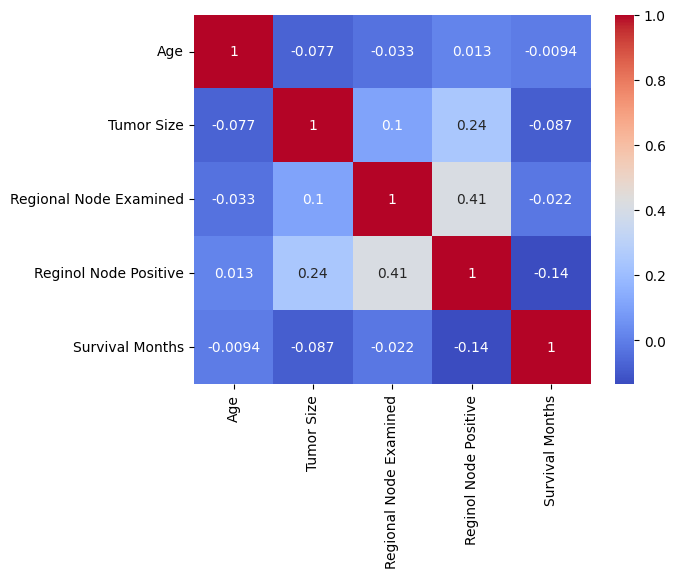

In [22]:
# Calculate the correlation matrix, ignoring non-numeric columns
corr_matrix = data.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

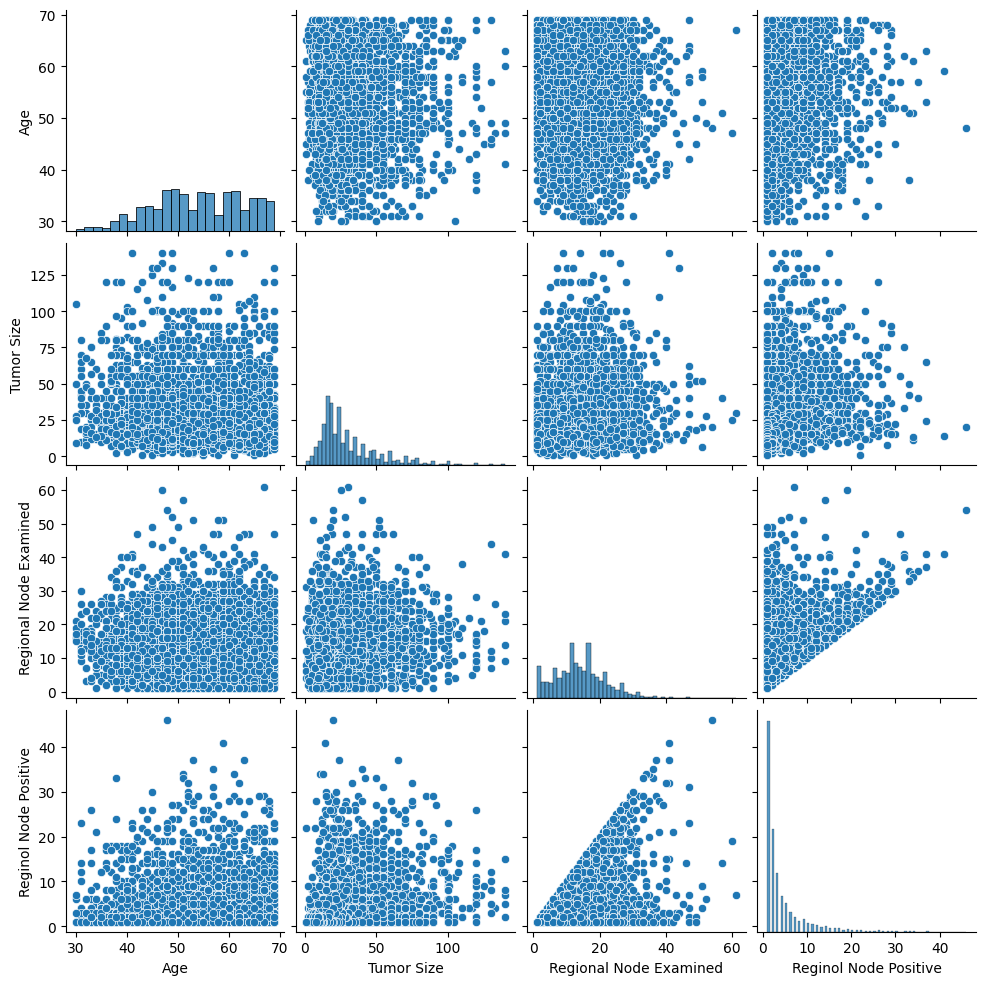

In [23]:
sns.pairplot(data=data[['Age','Tumor Size','Regional Node Examined','Reginol Node Positive']].dropna())
plt.show()

* There is a linear relationship between "Reginol Node Positive" and "Regional Node Examined".
* Regional Lymph Nodes Examined are the total number of regional lymph nodes that were removed and examined by the pathologist. Reginol Node Positive are the exact number of regional nodes examined by the pathologist and found to contain metastases. It looks like that these two features have a connection.

# Feature Engineering

In [24]:
# Encoding "Grade"
Vmap = {
    "Well differentiated; Grade I": 0,
    "Moderately differentiated; Grade II": 1,
    "Poorly differentiated; Grade III": 2,
    "Undifferentiated; anaplastic; Grade IV": 3
}
data['Grade'] = data['Grade'].replace(Vmap)

# Encoding "6th Stage"
Vmap = {
    "IIA": 0,
    "IIB": 1,
    "IIIA": 2,
    "IIIB": 3,
    "IIIC": 4
}
data['6th Stage'] = data['6th Stage'].replace(Vmap)

# Encoding "N Stage"
Vmap = {
    "N1": 0,
    "N2": 1,
    "N3": 2
}

data['N Stage'] = data['N Stage'].replace(Vmap)

# Encoding "T Stage"
Vmap = {
    "T1": 0,
    "T2": 1,
    "T3": 2,
    "T4": 3
}
data['T Stage '] = data['T Stage '].replace(Vmap)

# Encoding "Estrogen Status" and "Estrogen Status"
Vmap = {
    "Positive": 1,
    "Negative": 0,
    "Regional": 1,
    "Distant": 0
}
data['Estrogen Status'] = data['Estrogen Status'].replace(Vmap)
data['Progesterone Status'] = data['Progesterone Status'].replace(Vmap)

# Encoding "A Stage"
Vmap = {
    "Regional": 1,
    "Distant": 0
}
data['A Stage'] = data['A Stage'].replace(Vmap)

# Encoding "Race"
Vmap = {
    "White": 0,
    "Black": 1,
    "Other (American Indian/AK Native, Asian/Pacific Islander)": 2    
}
data['Race '] = data["Race "].replace(Vmap)

# Encoding "Marital Status"
Vmap = {
    "Married (including common law)": 0,
    "Single (never married)": 1,
    "Divorced": 2,
    "Widowed": 3,                           
    "Separated": 4                 
}
data['Marital Status'] = data["Marital Status"].replace(Vmap)

# Encoding "Status"
Vmap = {
    "Alive": 1,
    "Dead": 0
}
data['Status'] = data['Status'].replace(Vmap)

data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,2,0,1,2,4,1,1,40,1,1,19,11,1,1
1,47,2,0,1,1,2,1,1,45,1,1,25,9,2,1
2,67,0,0,1,0,1,2,1,25,1,1,4,1,2,0
3,46,0,2,0,0,0,1,1,19,1,1,26,1,2,0
4,63,0,0,1,1,2,1,1,35,1,1,21,5,3,0


In [25]:
data['Race '].value_counts()

Race 
0    3413
2     320
1     291
Name: count, dtype: int64

# Data PreProcessing

In [26]:
from sklearn.preprocessing import RobustScaler, StandardScaler
robust_scaler = RobustScaler()
data[['Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']] = robust_scaler.fit_transform(data[['Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']])

scaler = StandardScaler()
data[['Age']] = scaler.fit_transform(data[['Age']])

In [27]:
data[['Tumor Size', 'Regional Node Examined','Reginol Node Positive','Survival Months',]].min()

Tumor Size               -1.090909
Regional Node Examined   -1.300000
Reginol Node Positive    -0.250000
Survival Months          -2.117647
dtype: float64

In [28]:
# Treating outliers using log transformation
data['Tumor Size'] = np.log(data['Tumor Size']+2.09)
data['Regional Node Examined'] = np.log(data['Regional Node Examined']+2.30)
data['Reginol Node Positive'] = np.log(data['Reginol Node Positive']+1.25)
data['Survival Months'] = np.log(data['Survival Months']+3.12)

# Modeling Selection and Evaluation

In [29]:
X = data.copy()
X = X.drop(columns=["Status"])
y = data.Status

In [31]:
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,-1.224296,2,0,1,2,4,1,1,1.019503,1,1,1.029619e+00,1.252763,0.002350
1,-0.777968,2,0,1,1,2,1,1,1.098309,1,1,1.223775e+00,1.098612,0.031271
2,1.453671,0,0,1,0,1,2,1,0.737164,1,1,2.623643e-01,0.000000,0.031271
3,-0.889550,0,2,0,0,0,1,1,0.597337,1,1,1.252763e+00,0.000000,0.031271
4,1.007343,0,0,1,1,2,1,1,0.933952,1,1,1.098612e+00,0.693147,0.059378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,-0.220058,0,0,0,0,0,0,1,0.342299,1,1,1.029619e+00,0.000000,1.415853
4020,-0.108476,0,0,0,1,2,2,1,0.309488,0,0,7.884574e-01,0.693147,1.415853
4021,-0.108476,0,2,0,0,0,1,1,0.309488,0,0,2.623643e-01,0.223144,1.415853
4022,0.672598,2,0,0,0,0,1,1,0.309488,1,1,8.329091e-01,0.223144,1.415853


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)
X_test = X_valid

### Imbalanced Data

In [33]:
y_train.value_counts()/len(y_train) * 100

Status
1    84.684685
0    15.315315
Name: count, dtype: float64

In [41]:
data_train = pd.concat([X_train,y_train], axis = 1)

num_zero, num_one = data_train.Status.value_counts()
data_alive = data_train[data_train['Status']==1]
data_dead = data_train[data_train['Status']==0]

data_alive = data_alive.sample(n=num_one, replace=False)
data_train_balanced = pd.concat([data_alive,data_dead], axis = 0)

X_train = data_train_balanced.drop(columns=['Status'])
y_train = data_train_balanced.Status

In [44]:
print(y_train.value_counts()/len(y_train) * 100)

Status
1    50.0
0    50.0
Name: count, dtype: float64


<Axes: xlabel='Status'>

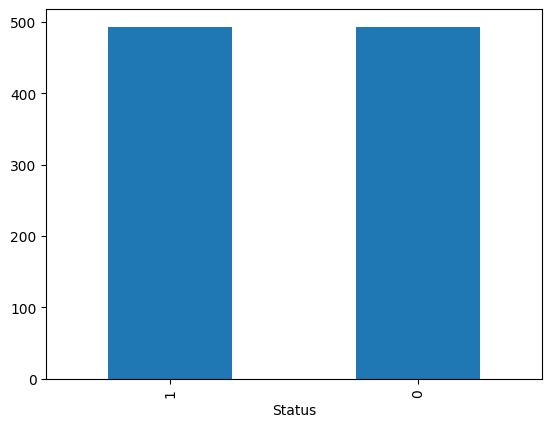

In [42]:
y_train.value_counts().plot(kind = 'bar')

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Logistic Regression

In [48]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_valid)

In [49]:
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_valid, y_pred)
print('Classification Report:')
print(report)

cv_scores = cross_val_score(logmodel, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))

Accuracy: 0.8211180124223603
Confusion Matrix:
[[ 97  26]
 [118 564]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.79      0.57       123
           1       0.96      0.83      0.89       682

    accuracy                           0.82       805
   macro avg       0.70      0.81      0.73       805
weighted avg       0.88      0.82      0.84       805

Cross-Validation Scores: [0.66459627 0.94658385 0.88074534 0.85590062 0.84701493]
Average Cross-Validation Score: 0.8389682024659312


## SVC Model

In [51]:
clf = SVC(gamma="scale")
clf.fit(X_train,y_train)

SVC()

In [52]:
y_pred=clf.predict(X_valid)

In [53]:
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_valid, y_pred)
print('Classification Report:')
print(report)

cv_scores = cross_val_score(clf, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))

Accuracy: 0.7838509316770186
Confusion Matrix:
[[ 96  27]
 [147 535]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.78      0.52       123
           1       0.95      0.78      0.86       682

    accuracy                           0.78       805
   macro avg       0.67      0.78      0.69       805
weighted avg       0.87      0.78      0.81       805

Cross-Validation Scores: [0.86086957 0.90186335 0.86086957 0.85217391 0.84950249]
Average Cross-Validation Score: 0.8650557770155434
